In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
from myData import *

In [12]:
numData = 10000
generateData = makeData(numData)


In [13]:
def plotCircle(title,xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1):
    plt.figure(figsize=(10,10))
    plt.plot(xCircleLabel0,yCircleLabel0,'ro',label='Circle 0')
    plt.plot(xCircleLabel1,yCircleLabel1,'bo',label='Circle 1')
    plt.axis('scaled')
    plt.title(title)
    plt.legend()
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.show()

In [14]:
def getPointsList(n = False):
    ans = generateData.getData(n)
    data = ans[0]
    labels = ans[1]
    xCircleLabel0 = []
    yCircleLabel0 = []
    xCircleLabel1 = []
    yCircleLabel1 = []
    i=0
    while i< len(data):
        if(labels[i] == 1):
            yCircleLabel1.append(data[i][1])
            xCircleLabel1.append(data[i][0])
        else:
            yCircleLabel0.append(data[i][1])
            xCircleLabel0.append(data[i][0])
        i+=1
    if(n):
        plotCircle('Generated Data with Noise',xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1)
    else:
        plotCircle('Generated Data without noise',xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1)

    return data, labels, xCircleLabel0, yCircleLabel0, xCircleLabel1, yCircleLabel1

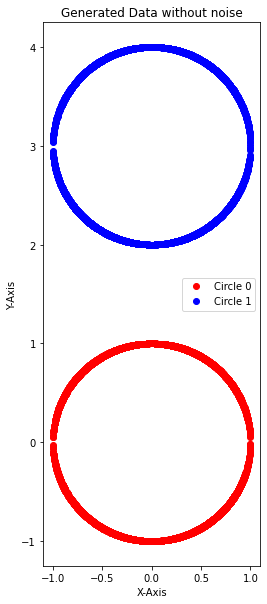

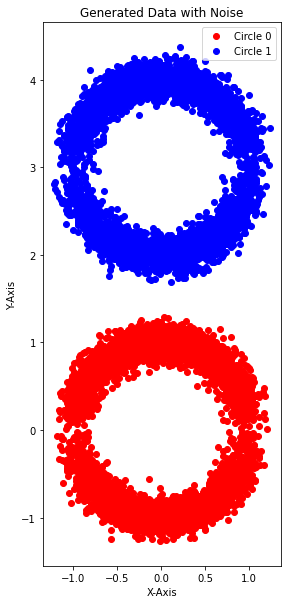

In [15]:
points1,dataLabel1,xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1 = getPointsList()
points2,dataLabel2,xCircleLabel0Noise,yCircleLabel0Noise,xCircleLabel1Noise,yCircleLabel1Noise = getPointsList(True)

### Decision Boundary of Model trained without Noise

In [16]:
def plotBoundary(xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1,title,perceptron,weightNoNoise ="",hasNoBias = False):
    plt.figure(figsize=(10,10))
    plt.plot(xCircleLabel0,yCircleLabel0,'ro',label='Circle 0')
    plt.plot(xCircleLabel1,yCircleLabel1,'bo',label='Circle 1')
    ltPoint = np.linspace(-5,5,100)
    weight = perceptron.getParameters(0)
    bias = perceptron.getParameters(1)
    if  not hasNoBias:
        plt.plot(ltPoint,(-weight[0]*ltPoint-bias)/weight[1],'g',label='Model Decision Boundary')
    else:
        plt.plot(ltPoint,(-weightNoNoise[0]*ltPoint)/weight[1],'g',label='Model Decision Boundary')
    plt.xlabel('X-Axis')
    plt.ylabel('Y-Axis')
    plt.axis('scaled')
    plt.title(title)
    plt.legend()
    plt.show()

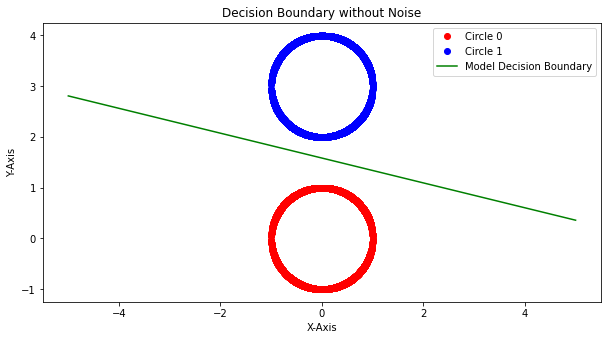

In [17]:
withoutNoise = MyPerceptron(points1,dataLabel1)
withoutNoise.train()
plotBoundary(xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1,'Decision Boundary without Noise',withoutNoise)

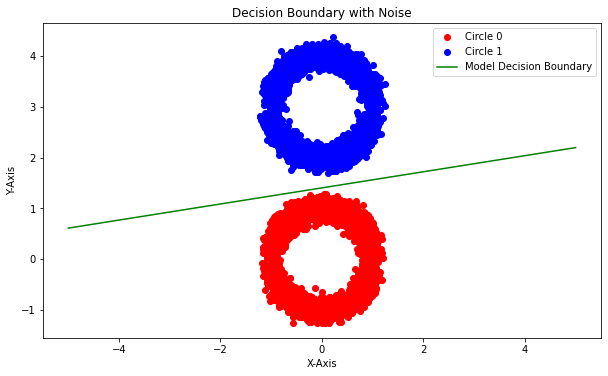

In [18]:
withNoise = MyPerceptron(points2,dataLabel2)
withNoise.train()
plotBoundary(xCircleLabel0Noise,yCircleLabel0Noise,xCircleLabel1Noise,yCircleLabel1Noise,'Decision Boundary with Noise',withNoise)

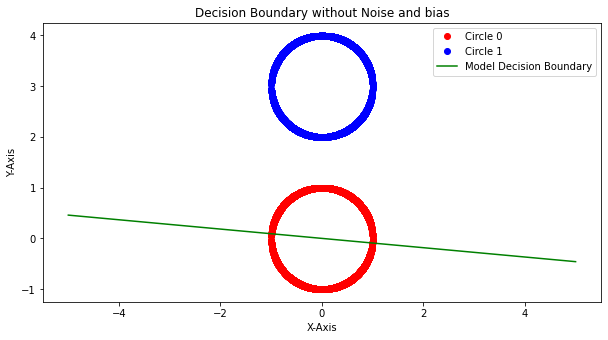

In [20]:
withoutNoiseandBias = MyPerceptron(points1,dataLabel1,biasState=False)
withoutNoiseandBias.train()
weightNoNoise = withoutNoise.getParameters(0)
plotBoundary(xCircleLabel0,yCircleLabel0,xCircleLabel1,yCircleLabel1,'Decision Boundary without Noise and bias',withoutNoiseandBias,hasNoBias=True,weightNoNoise=weightNoNoise)

### As evident no decision boundary exists

In [23]:
possiblePoints = np.array([[0,0],[0,1],[1,0],[1,1]])
LabelAND = np.array([0,0,0,1])
LabelOR = np.array([0,1,1,1])
LabelXOR = np.array([0,1,1,0])


In [24]:
def plotGate(title,perceptron,mylabel,hasNoBias = False,):
    weight = perceptron.getParameters(0)
    bias = perceptron.getParameters(1)
    if not hasNoBias:
        if(weight[0] != 0 and weight[1] != 0):
            ltPoint = np.linspace(-2,2,100)
            plt.figure(figsize=(10,10))
            plt.plot([0,0,1,1],[0,1,0,1],'ro',label=mylabel)
            plt.plot(ltPoint,(-weight[0]*ltPoint-bias)/weight[1],'g',label='Model Decision Boundary')
            plt.axis('scaled')
            plt.title(title)
            plt.legend()
            plt.xlabel('X-Axis')
            plt.ylabel('Y-Axis')
            plt.show()
        else:
            print('The model is not able to classify the data')
    else:
        if(weight[0] != 0 and weight[1] != 0):
            ltPoint = np.linspace(-4,2,100)
            plt.figure(figsize=(10,10))
            plt.plot([0,0,1,1],[0,1,0,1],'ro',label=mylabel)
            plt.plot(ltPoint,(-weight[0]*ltPoint)/weight[1],'g',label='Model Decision Boundary')
            plt.axis('scaled')
            plt.title(title)
            plt.legend()
            plt.xlabel('X-Axis')
            plt.ylabel('Y-Axis')
            plt.show()
        else:
            print('The model is not possible')

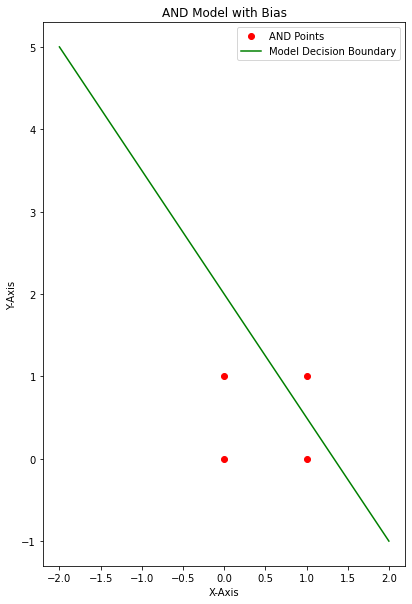

In [25]:
ANDModel = MyPerceptron(possiblePoints,LabelAND)
ANDModel.train()
plotGate('AND Model with Bias',ANDModel,'AND Points')

In [26]:
ANDModelwithoutBias = MyPerceptron(possiblePoints,LabelAND,biasState=False)
ANDModelwithoutBias.train()
plotGate('AND Model without Bias',ANDModelwithoutBias,'AND Points',hasNoBias=True)


The model is not possible


### OR Model with Bias

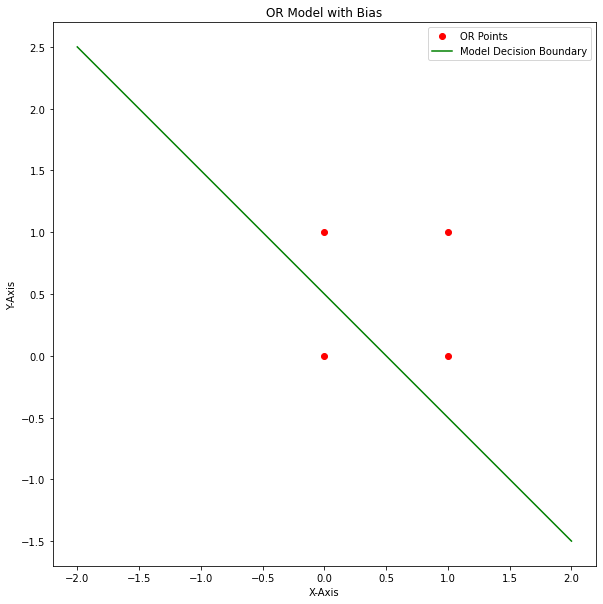

In [27]:
ORModel = MyPerceptron(possiblePoints,LabelOR)
ORModel.train()
plotGate('OR Model with Bias',ORModel,'OR Points')

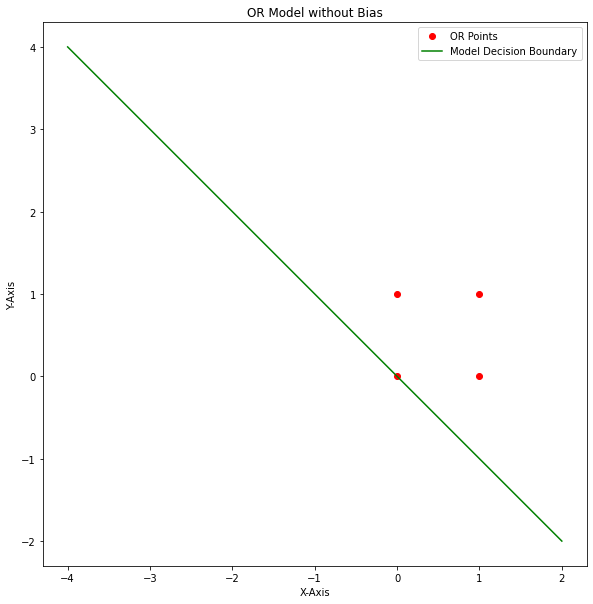

In [31]:
ORModelwithoutBias = MyPerceptron(possiblePoints,LabelOR,biasState=False)
ORModelwithoutBias.train()
plotGate('OR Model without Bias',ORModelwithoutBias,'OR Points',hasNoBias=True)

In [29]:
XORModel = MyPerceptron(possiblePoints,LabelXOR)
XORModel.train()
plotGate('XOR Model with Bias',XORModel,'XOR Points')

The model is not able to classify the data


In [30]:
XORModelwithoutBias = MyPerceptron(possiblePoints,LabelXOR,biasState=False)
XORModelwithoutBias.train()
plotGate('XOR Model without Bias',XORModelwithoutBias,'XOR Points',hasNoBias=True)

The model is not possible
